In [25]:
# define all the necessary libraries into the dataset 
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt #for plotting co-ordinates
import seaborn as sns;

In [27]:
# Load the dataset from local storage
df = pd.read_csv("Iris.csv")

In [8]:
#printing the top some rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#printing some bottom dataset
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
#printing the columns in the dataset
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
#Describing the IRIS flower set
#1.List down the features and their types (e.g., numeric, nominal) available in the dataset.
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
#printing number of rows and columns
rows,columns=iris.shape

In [15]:
rows,columns

(150, 6)

In [37]:
#Check Data Types
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [28]:
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [39]:
#) Separate Numeric & Categorical Features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:", numeric_features)
print("Categorical Features:", categorical_features)



Numerical Features: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Categorical Features: ['Species']


<Figure size 1200x1000 with 0 Axes>

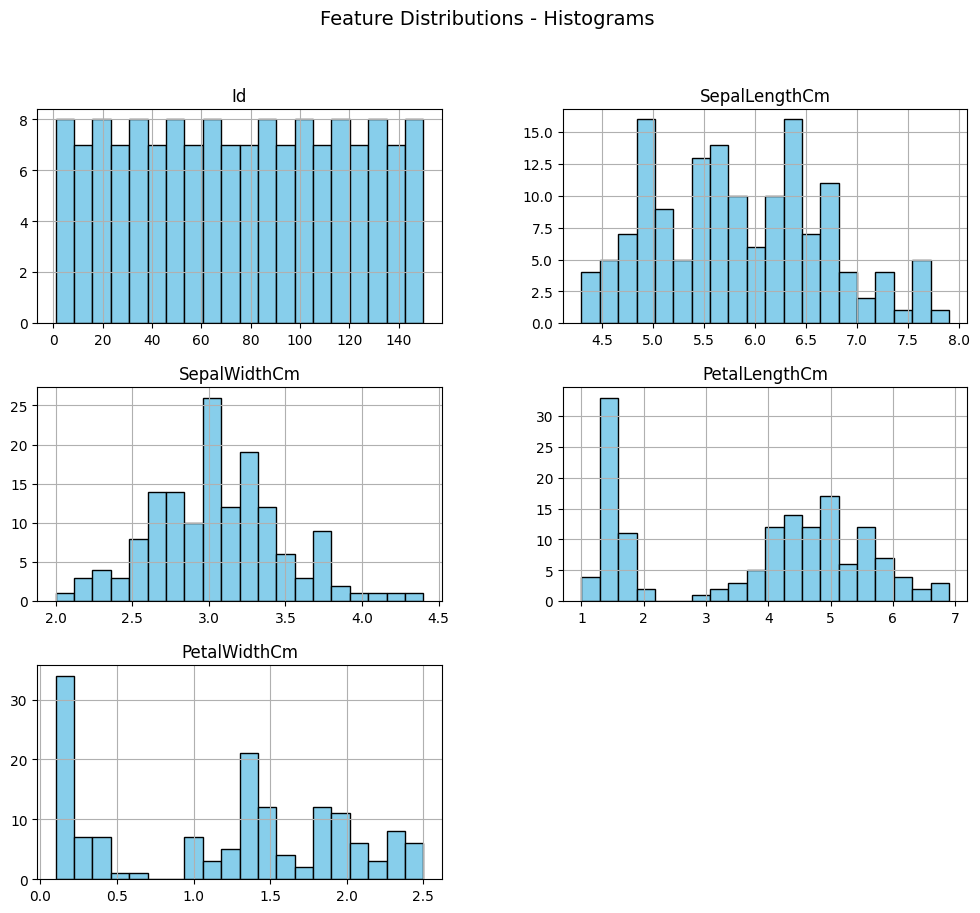

In [38]:
#2.Create a histogram for each feature in the dataset to illustrate the feature distributions.
plt.figure(figsize=(12, 10))
df[numeric_features].hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions - Histograms", fontsize=14)
plt.show()


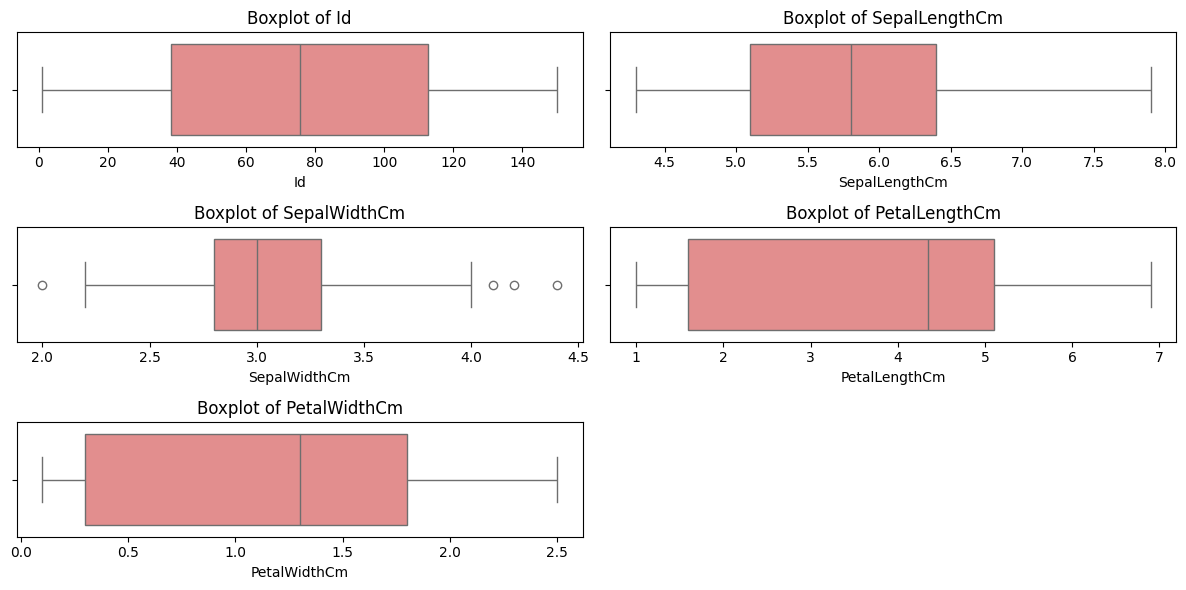

In [40]:
# Detect Outliers using Box Plots
plt.figure(figsize=(12, 6))

# Adjust number of rows dynamically based on number of features
num_features = len(numeric_features)
rows = (num_features // 2) + (num_features % 2)  # Ensure enough rows

for i, feature in enumerate(numeric_features, 1):  # Start from 1
    plt.subplot(rows, 2, i)  # Adjust grid dynamically
    sns.boxplot(x=df[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


In [47]:
#Identify Outliers using IQR
outliers = {}
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

print("\nOutliers Detected:")
for feature, outlier_values in outliers.items():
    print(f"{feature}: {outlier_values.values}")



Outliers Detected:
Id: []
SepalLengthCm: []
SepalWidthCm: []
PetalLengthCm: []
PetalWidthCm: []


In [48]:
#Remove Outliers
def remove_outliers(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

df_cleaned = remove_outliers(df, numeric_features)

# Compare dataset sizes
print(f"\nOriginal Dataset Size: {df.shape[0]} rows")
print(f"Cleaned Dataset Size: {df_cleaned.shape[0]} rows")


Original Dataset Size: 146 rows
Cleaned Dataset Size: 146 rows


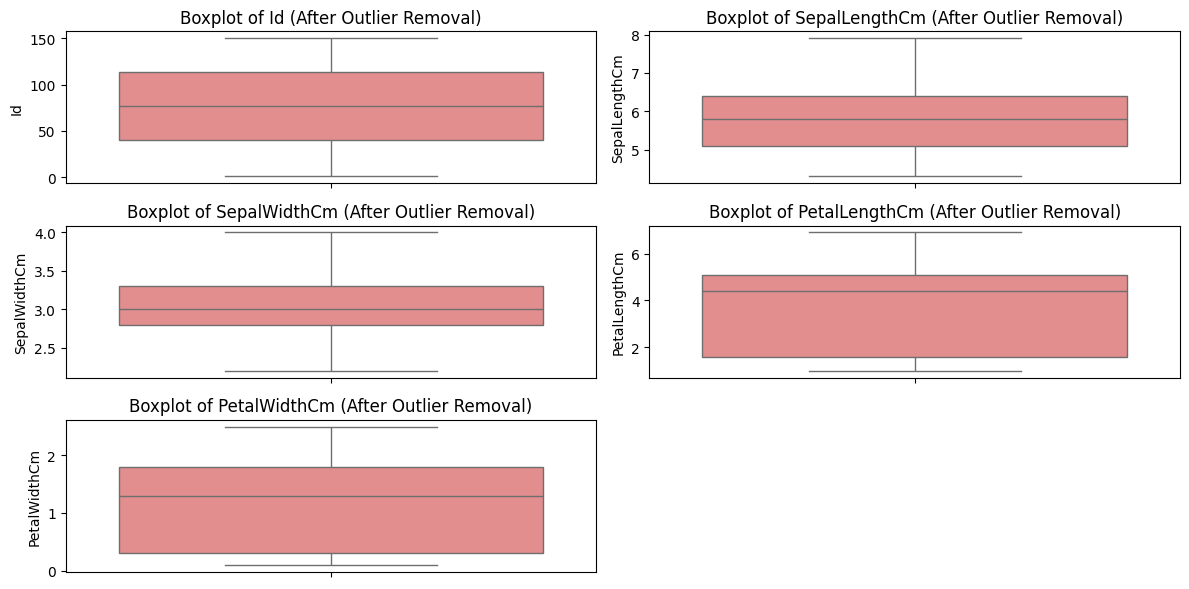

In [50]:
num_features = len(numeric_features)
rows = (num_features // 2) + (num_features % 2)  # Adjust rows dynamically
cols = 2  # Define columns

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(rows, cols, i)  # Dynamic grid
    sns.boxplot(y=df_cleaned[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature} (After Outlier Removal)')
plt.tight_layout()
plt.show()